# 연도별 전체 카드매출액 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 카드매출액 데이터 읽어오기

In [2]:
cd = pd.read_excel("data/creditcard.xlsx")

In [4]:
cd.head()

,계정항목별,금융기관 유형코드별,2019.01,2019.02,2019.03,2019.04,2019.05,2019.06,2019.07,2019.08,...,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10,2021.11,2021.12
0,전체 이용건수 (천건),합계,1163666,1041821,1183273,1214191,1284292,1229426,1311804,1306008,...,1268493,1262666,1315494,1318726,1334263,1327038,1289028,1352100,1366556,1339269
1,NaN,은행계,766479,673309,776973,801784,843703,804924,861031,849997,...,818475,813282,842277,846882,852441,847139,821180,854070,870399,848992
2,NaN,비은행계,397187,368512,406300,412408,440589,424502,450772,456011,...,450018,449384,473216,471844,481821,479899,467848,498030,496157,490277
3,개인 이용건수 (천건),합계,1074268,965929,1090364,1121038,1186087,1136078,1211871,1208810,...,1170257,1163225,1218286,1215925,1231257,1230648,1196198,1251571,1262803,1233824
4,NaN,은행계,685698,604908,693226,717670,754879,720458,770799,762064,...,729820,723459,754174,754057,759476,759858,737472,763666,777289,754417


### 전체 카드매출액 데이터 행 확인 후 해당값만 색인

In [7]:
t_cd = cd.iloc[18]
t_cd = t_cd[2:]
t_cd.head()

2019.01    64529843
2019.02    56072880
2019.03    63420153
2019.04    64460911
2019.05    68206706
Name: 18, dtype: object

In [8]:
t_cd.index.names = ['기준년월']
t_cd.name = '전체이용금액'
frame = pd.DataFrame(t_cd)
frame.tail(5)

,전체이용금액
기준년월,
2021.08,69232090
2021.09,71235370
2021.10,73520115
2021.11,74438865
2021.12,75912264


In [10]:
frame.index

Index(['2019.01', '2019.02', '2019.03', '2019.04', '2019.05', '2019.06',
       '2019.07', '2019.08', '2019.09', '2019.10', '2019.11', '2019.12',
       '2020.01', '2020.02', '2020.03', '2020.04', '2020.05', '2020.06',
       '2020.07', '2020.08', '2020.09', '2020.10', '2020.11', '2020.12',
       '2021.01', '2021.02', '2021.03', '2021.04', '2021.05', '2021.06',
       '2021.07', '2021.08', '2021.09', '2021.10', '2021.11', '2021.12'],
      dtype='object', name='기준년월')

In [27]:
frame = frame.reset_index()
frame.head()

,level_0,index,기준년월,전체이용금액
0,0,0,2019.01,64529843
1,1,1,2019.02,56072880
2,2,2,2019.03,63420153
3,3,3,2019.04,64460911
4,4,4,2019.05,68206706


In [15]:
frame['기준년월'].str.split('.').tolist()

[['2019', '01'],
 ['2019', '02'],
 ['2019', '03'],
 ['2019', '04'],
 ['2019', '05'],
 ['2019', '06'],
 ['2019', '07'],
 ['2019', '08'],
 ['2019', '09'],
 ['2019', '10'],
 ['2019', '11'],
 ['2019', '12'],
 ['2020', '01'],
 ['2020', '02'],
 ['2020', '03'],
 ['2020', '04'],
 ['2020', '05'],
 ['2020', '06'],
 ['2020', '07'],
 ['2020', '08'],
 ['2020', '09'],
 ['2020', '10'],
 ['2020', '11'],
 ['2020', '12'],
 ['2021', '01'],
 ['2021', '02'],
 ['2021', '03'],
 ['2021', '04'],
 ['2021', '05'],
 ['2021', '06'],
 ['2021', '07'],
 ['2021', '08'],
 ['2021', '09'],
 ['2021', '10'],
 ['2021', '11'],
 ['2021', '12']]

In [16]:
frame1 = pd.DataFrame(frame['기준년월'].str.split('.').tolist(),columns=['year', 'month'])
frame1.head(5)

,year,month
0,2019,01
1,2019,02
2,2019,03
3,2019,04
4,2019,05


In [17]:
frame2 = pd.concat([frame1, frame], axis = 1)
frame2.head(5)

,year,month,index,기준년월,전체이용금액
0,2019,01,0,2019.01,64529843
1,2019,02,1,2019.02,56072880
2,2019,03,2,2019.03,63420153
3,2019,04,3,2019.04,64460911
4,2019,05,4,2019.05,68206706


In [18]:
frame2019 = frame2[frame2['year'] == '2019']
frame2020 = frame2[frame2['year'] == '2020']
frame2021 = frame2[frame2['year'] == '2021']

frame2019

,year,month,index,기준년월,전체이용금액
0,2019,01,0,2019.01,64529843
1,2019,02,1,2019.02,56072880
2,2019,03,2,2019.03,63420153
3,2019,04,3,2019.04,64460911
4,2019,05,4,2019.05,68206706
5,2019,06,5,2019.06,62589352
6,2019,07,6,2019.07,66376983
7,2019,08,7,2019.08,64765092
8,2019,09,8,2019.09,63637099
9,2019,10,9,2019.10,67264005


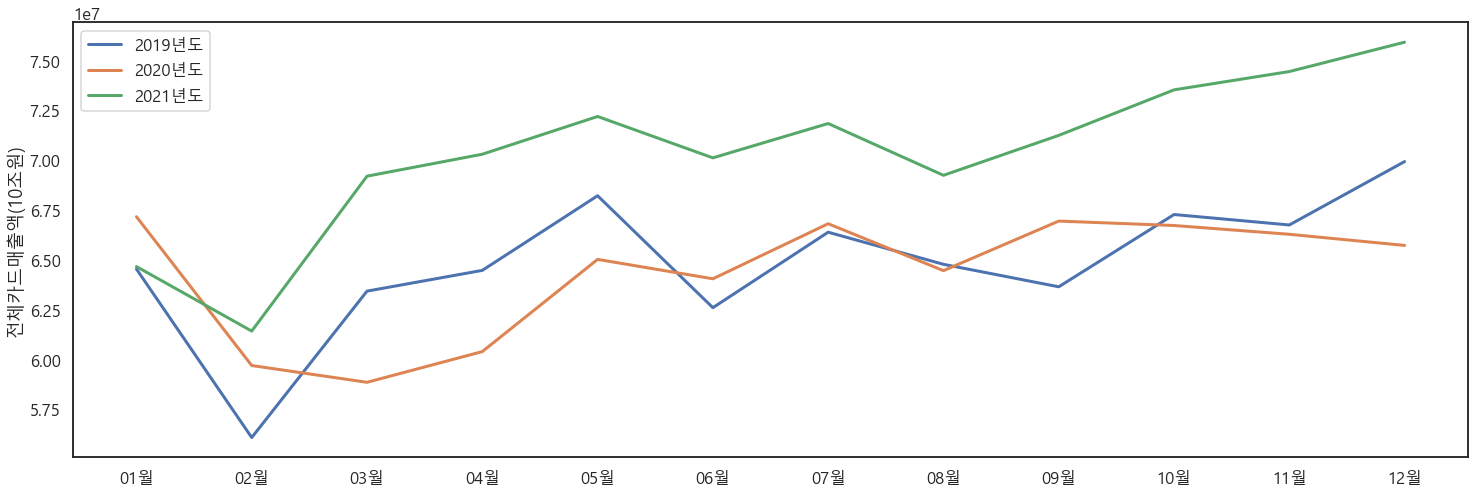

In [26]:
fig = plt.figure(figsize=(25, 8))
sns.set(style="white", context="talk", font="Malgun Gothic")

plt.plot(frame2019['month']+'월', frame2019["전체이용금액"], label="2019년도", linewidth=3)
plt.plot(frame2020['month']+'월', frame2020["전체이용금액"], label="2020년도", linewidth=3)
plt.plot(frame2021['month']+'월', frame2021["전체이용금액"], label="2021년도", linewidth=3)
# plt.rc('font', family='Malgun Gothic')
plt.ylabel("전체카드매출액(10조원)")
plt.legend()
plt.show()